In [6]:
import pandas  as pd
from feature_selector import FeatureSelector
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

train_labels = data.satisfied
train = data.drop(columns=['satisfied', 'id'])

fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.5,    
                                    'correlation_threshold': 0.8, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})

#test_data = pd.read_csv('test.csv')
#test_data_select = test_data[selected_features]

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,4,6,10,12,18,24,35,56,57,65,85,86,87,88,89,98,99,100,105,124,125,126,127,128,130,131,133,166,171,172,192,193,194,195,204,205,206,207,228,229,230,240,256,257,258,259,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


9 features with greater than 0.50 missing values.

0 features with a single unique value.

1 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[162]	valid_0's auc: 0.894309	valid_0's binary_logloss: 0.411572
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[184]	valid_0's auc: 0.892145	valid_0's binary_logloss: 0.415208
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[131]	valid_0's auc: 0.8929	valid_0's binary_logloss: 0.414729
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[168]	valid_0's auc: 0.89043	valid_0's binary_logloss: 0.41763
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.886347	valid_0's binary_logloss: 0.425132
Training 

In [7]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)

train_new = train[list(train_removed_all_once.columns)]

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 6085 features including one-hot features.


In [9]:
for column in train_new.columns:
    train_new[column].fillna(train_new[column].mode()[0], inplace=True)

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:

fs = FeatureSelector(data = train_new, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.5,    
                                    'correlation_threshold': 0.8, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})


0 features with greater than 0.50 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.80.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[183]	valid_0's auc: 0.891168	valid_0's binary_logloss: 0.417505
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[309]	valid_0's auc: 0.890366	valid_0's binary_logloss: 0.417478
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	valid_0's auc: 0.890089	valid_0's binary_logloss: 0.419301
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.891284	valid_0's binary_logloss: 0.416679
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[218]	valid_0's auc: 0.891524	valid_0's binary_logloss: 0.415693
Train

In [27]:
new_train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = False)
new_train_removed_with_dummy = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 6021 features including one-hot features.
['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 4596 features.


In [38]:
X = new_train_removed_with_dummy.drop(columns = train_new.columns)
X.head()

,v1_.b,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,...,cntry_GB,cntry_HU,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. LGB

In [194]:
X

,v1_.b,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,...,cntry_GB,cntry_HU,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30076,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30077,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
30078,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [195]:
X_no_duplicates = X.loc[:,~X.columns.duplicated()]


In [196]:
X_no_duplicates

,v1_.b,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,...,cntry_GB,cntry_HU,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30075,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30076,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30077,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
30078,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [202]:
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
result = next(kf.split(X), None)
result1 = next(kf.split(train_labels), None)


X_train = X.iloc[result[0]]
y_train =  train_labels.iloc[result1[0]]
X_test = X.iloc[result[1]]
y_test =  train_labels.iloc[result1[1]]

In [135]:
#X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=0.3, random_state=441)

In [149]:
y_train

1        0
3        0
4        1
5        0
6        1
        ..
30075    1
30076    1
30077    0
30078    1
30079    0
Name: satisfied, Length: 27072, dtype: int64

In [203]:
import time
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


params = {'boosting_type': 'gbdt',
          'num_leaves': 80, #结果对最终效果影响较大，越大值越好，太大会出现过拟合
          'min_data_in_leaf': 30,
          'objective': 'binary', #定义的目标函数
          'max_depth': -1,
          'learning_rate': 0.05,
          "min_sum_hessian_in_leaf": 6,
          "boosting": "gbdt",
          "feature_fraction": 0.9,  #提取的特征比率
          "bagging_freq": 1,
          "bagging_fraction": 0.8,
          "bagging_seed": 11,
          "lambda_l1": 0.1,             #l1正则
          # 'lambda_l2': 0.001,     #l2正则
          "verbosity": -1,
          "nthread": -1,                #线程数量，-1表示全部线程，线程越多，运行的速度越快
          'metric': {'binary_logloss', 'auc'},  ##评价函数选择
          "random_state": 2019, #随机数种子，可以防止每次运行的结果不一致
          # 'device': 'gpu' ##如果安装的事gpu版本的lightgbm,可以加快运算
          }

start = time.time()
lgb2 = lgb.train(train_set=train_data,
                      early_stopping_rounds=10,
                      num_boost_round=1000,
                      params=params,
                      valid_sets=test_data)
end = time.time()
print('lightgbm运行时间为{}秒'.format(round(end-start,0)))

[1]	valid_0's auc: 0.866392	valid_0's binary_logloss: 0.670744
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.873548	valid_0's binary_logloss: 0.652058
[3]	valid_0's auc: 0.87559	valid_0's binary_logloss: 0.635211
[4]	valid_0's auc: 0.87664	valid_0's binary_logloss: 0.619465
[5]	valid_0's auc: 0.877189	valid_0's binary_logloss: 0.605442
[6]	valid_0's auc: 0.877969	valid_0's binary_logloss: 0.592661
[7]	valid_0's auc: 0.878285	valid_0's binary_logloss: 0.580794
[8]	valid_0's auc: 0.878601	valid_0's binary_logloss: 0.569883
[9]	valid_0's auc: 0.879937	valid_0's binary_logloss: 0.559287
[10]	valid_0's auc: 0.880141	valid_0's binary_logloss: 0.550196
[11]	valid_0's auc: 0.880485	valid_0's binary_logloss: 0.541539
[12]	valid_0's auc: 0.880443	valid_0's binary_logloss: 0.533769
[13]	valid_0's auc: 0.880383	valid_0's binary_logloss: 0.52681
[14]	valid_0's auc: 0.880687	valid_0's binary_logloss: 0.52015
[15]	valid_0's auc: 0.880705	valid_0's binary_logloss: 0

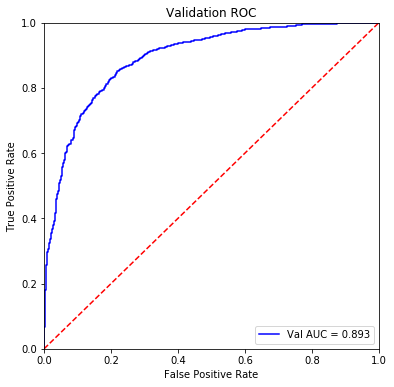

In [204]:
from sklearn import metrics
import matplotlib.pyplot as plt

lgb2_preds=lgb2.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, lgb2_preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [205]:
from sklearn.metrics import accuracy_score 
    
def fbeta(y_true, pred):
    # 调整阈值
    best_acc=0
    precision_recall = []
    best_thershold=0
    for thershold in [0.15,0.2, 0.25,0.3,0.4,0.42, 0.43, 0.44,0.445, 0.45, 0.46, 0.47, 0.48, 0.49,0.5,0.52125, 0.525, 0.55, 0.6, 0.65, 0.7]:
        preds = [1 if i > thershold else 0 for i in pred]
        cur_acc = accuracy_score(y_test, preds)
        if cur_acc > best_acc:
            best_thershold = thershold
            best_acc = cur_acc
            print(best_acc)
    return 'best_thershold', best_thershold,True

In [206]:

fbeta(y_test, lgb2_preds)

0.723404255319149
0.7526595744680851
0.7795877659574468
0.7975398936170213
0.8098404255319149
0.8101728723404256
0.8134973404255319
0.8148271276595744
0.817154255319149
0.8181515957446809


('best_thershold', 0.47, True)

In [223]:
len(set(X_train.columns))

1425

In [224]:
len(X_train.columns)

1782

In [221]:
test_data = pd.read_csv('test.csv')

test_data_dummy = pd.get_dummies(test_data)



test = pd.DataFrame()
test

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,6,10,12,21,24,35,85,87,88,89,100,124,126,127,128,130,131,133,166,172,177,193,194,195,205,206,207,220,222,228,229,230,240,257,258,260,261,262) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


""


In [220]:
for column in X_train.columns:
    print(column)
    if column in test:
        pd.concat([test, test_data.column], axis=1, sort=False)
    else:
        test.insert(0,column,0)


v1_.b
v1_0
v1_1
v1_10
v1_2
v1_3
v1_4
v1_5
v1_6
v1_7
v1_8
v1_9
v2_1
v2_2
v2_3
v3_16
v3_16
1


AttributeError: 'DataFrame' object has no attribute 'column'

In [212]:
test

,v3_16,v2_3,v2_2,v2_1,v1_9,v1_8,v1_7,v1_6,v1_5,v1_4,v1_3,v1_2,v1_10,v1_1,v1_0,v1_.b


In [218]:
test_data.v1_b

AttributeError: 'DataFrame' object has no attribute 'v1_b'

In [192]:
test_data_selected = test_data_selected.loc[:,~test_data_selected.columns.duplicated()]


In [193]:
test_data_selected

,v1_.b,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,...,cntry_GB,cntry_HU,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9241,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9242,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
for i in test_data_selected.columns:
    if i not in X_train.columns:
        print(i)

In [182]:
test_data_selected

,v1_.b,v1_0,v1_1,v1_10,v1_2,v1_3,v1_4,v1_5,v1_6,v1_7,...,cntry_GB,cntry_HU,cntry_IE,cntry_LT,cntry_NL,cntry_NO,cntry_PL,cntry_PT,cntry_SE,cntry_SI
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9241,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9242,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
lgb2_test_preds=lgb2.predict(test_data_selected)


LightGBMError: The number of features in data (2147) is not the same as it was in training data (1782).

# 2. Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/weiyuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
clf_preds = clf.predict(X_test)

In [156]:
clf_pred_probs = clf.predict_proba(X_test)
clf_pred_probs

array([[0.42635712, 0.57364288],
       [0.04631859, 0.95368141],
       [0.33950139, 0.66049861],
       ...,
       [0.4099548 , 0.5900452 ],
       [0.73005489, 0.26994511],
       [0.91870002, 0.08129998]])

In [157]:
fbeta(y_test, clf_pred_probs[:,1])

0.7293882978723404
0.757313829787234
0.7732712765957447
0.792220744680851
0.8055186170212766
0.807845744680851


('best_thershold', 0.45, True)

# 3. RF

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rf_clf = RandomForestClassifier(n_estimators= 500,max_depth=40, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [159]:
rf_clf_preds = rf_clf.predict(X_test)

In [160]:
rf_clf_pred_probs = rf_clf.predict_proba(X_test)
rf_clf_pred_probs

array([[0.756     , 0.244     ],
       [0.17109454, 0.82890546],
       [0.61836016, 0.38163984],
       ...,
       [0.33418164, 0.66581836],
       [0.58931876, 0.41068124],
       [0.76397783, 0.23602217]])

In [161]:
fbeta(y_test, rf_clf_pred_probs[:,1])

0.5964095744680851
0.6429521276595744
0.695811170212766
0.7400265957446809
0.7962101063829787
0.8108377659574468


('best_thershold', 0.45, True)

# 4. KNN

In [164]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [165]:
knn_clf_pred_probs = neigh.predict_proba(X_test)

fbeta(y_test, knn_clf_pred_probs[:,1])

0.6253324468085106
0.6808510638297872


('best_thershold', 0.4, True)

# 5. Neural Network

In [166]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                       hidden_layer_sizes=(5, 2), random_state=1)

nn_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [167]:
nn_clf_pred_probs = nn_clf.predict_proba(X_test)

fbeta(y_test, nn_clf_pred_probs[:,1])

0.7423537234042553
0.753656914893617
0.7626329787234043
0.7662898936170213
0.7699468085106383
0.7706117021276596
0.7722739361702128


('best_thershold', 0.43, True)